# Regresja liniowa
## Nadmierne dopasowanie i wariancja

Perfekcyjne dopasowanie punktów danych do linii oznacza przetrzenowanie modelu. A celem regresji jest minimalizacja błędu i predykcja na nowych danych. Przetrenowanie, nadmierne dopasowanie do danych treningowych może zatem rodzić więcej problemów niż pożytku.

Progrnozy przetrenowanego modelu (lub zapamiętanie danych) będą cechować się dużą wariancją. Może być to szczególnie widoczne w przypadku datasetów z większym rozrzutem danych i ilością danych odstających. W regresji nie chodzi o perfekcyjną predycję, a dobre generalizowanie.

Regresja liniowa uważana jest za model mocno obciążony (nie mylić z obciążeniem danych). Aby uniknąć nadmiernego przetrenowania, i zachować linię prostą regresji, dodajemy 'obciążenie' do regresji. 

W regresji liniowej bardzo często używanymi wariantami są regresja lasso i regresja grzbietowa (ridge). Lasso marginalizuje zmienne powodujące szum - szczególnie przydatne, gdy w zbiorze istnieją zmienne, które są mniej wartościowe dla predykcji. Regresja ridge dodaje tzw. karę (obciążenie) do regresji, co powoduje mniejsze dopasowanie do danych. 

## Metoda stochastycznego gradientu prostego

Czym różni się gradient prosty od metody stochastycznej gradientu prostego? Tym, że zamiast uczenia na wszystkich danych treningowych (gradient prosty) uczymy model w każdej iteracji na jednej próbie danych. 

Dlaczego ta metoda jest lepsza od zwyczajnego gradientu prostego? Po pierwsze gwarantuje szybsze obliczenia. A po drugie - ogranicza ryzyka nadmiernego dopasowania. Poprzez to, że w każdej iteracji algorytm otrzymuje nowe dane, uniemożliwia to jego szybkie zejście do minimum.



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [12]:
data = pd.read_csv('https://bit.ly/2KF29Bd', header=0)

In [8]:
data.head()

,x,y
0,1,5
1,2,10
2,3,10
3,4,15
4,5,14


In [7]:
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

In [9]:
n = data.shape[0]
m = 0.0
b = 0.0
rozmiar_proby = 1
L = .0001
epoki = 1000000

In [10]:
# stochastyczny gradient prosty
for i in range(epoki):
    idx = np.random.choice(n, rozmiar_proby, replace=False)
    x_proba = x[idx]
    y_proba = y[idx]
    
    # aktualna przewidywana wartosc y
    y_pred = m * x_proba + b
    # pochodna d/dm funkcji straty
    d_m = (-2 / rozmiar_proby) * sum(x_proba * (y_proba - y_pred))
    # pochodna d/db funkcji straty
    d_b = (-2 / rozmiar_proby) * sum(y_proba - y_pred)
    
    #aktualizacja m i b
    m = m - L * d_m
    b = m - L * d_b
    
    if i % 10000 == 0:
        print(i, m, b)
print(f"y = {m}x +{b}")

0 0.028800000000000003 0.032400000000000005
10000 2.267541573835922 2.2673655211673265
20000 2.2895735675347235 2.2893664142118326
30000 2.2877202233434533 2.2875156103201233
40000 2.2777426717836424 2.2784677376683806
50000 2.275538016969995 2.2759952066463143
60000 2.3025216443857572 2.3026388415675814
70000 2.296370207091964 2.295907897819046
80000 2.27891810143072 2.2789836664030045
90000 2.318575443851066 2.3183273397821864
100000 2.2668212696355488 2.2666463299865565
110000 2.288633592393915 2.288718047219837
120000 2.261979083420496 2.2615007298866856
130000 2.2735067314361403 2.274143473071096
140000 2.2868290075507494 2.286885115144734
150000 2.325801565155889 2.3255431514538834
160000 2.2972398442645074 2.2970217948146567
170000 2.264520316156323 2.264348415489949
180000 2.2975176904692773 2.298222984655242
190000 2.2975454197676792 2.2977077404440265
200000 2.301537942963756 2.3013137830890606
210000 2.311587502958531 2.3116138033898803
220000 2.29160511137922 2.291688417762

Aby zredukować nadmierne dopasowanie dodatkowo wprowadziliśmy trochę losowości. Ze względu na zastosowanie metody stochastycznej, wyniki mieć szerszy zakres niż w przypadku tradycyjnego gradientu prostego.

## Współczynnik korelacji

W przypadku danych silnie roproszonych, regresja liniowa nie będzie działać najlepiej. Poniżej mamy przykład:

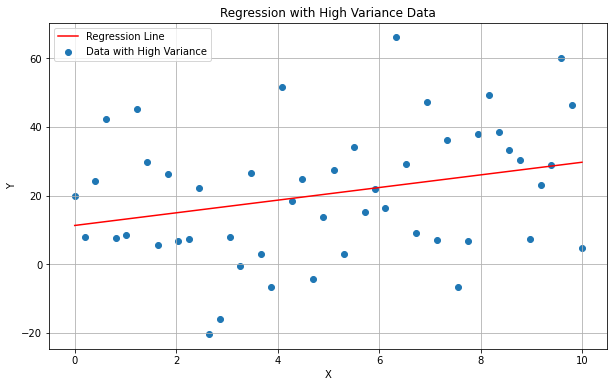

In [5]:
# Generate random data with high variance
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 3 * x + 10 + np.random.normal(0, 20, 50)

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1)
regression_line = np.polyval(coefficients, x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data with High Variance')
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression with High Variance Data')
plt.legend()
plt.grid(True)
plt.show()


W przypadku danych z wysoką wariancją, model staje się mniej skuteczny. Przewidywania są mniej dokładne, a tym samym mało użyteczne. Obserwujemy również wysokie wartości reszt. Niedostateczne dopasowanie modelu jest tak samo niekorzystne, jak jego nadmierne dopasowanie do danych treningowych. 

**Korelacja Pearsona**

Aby zmierzyć za jednym razem zarówno, jaką wartość przyjmują reszty, a także jaką wariancję obserwujemy w danych, możemy wykorzystać korelację pearsona (oznaczana symbolem r). Mierzy ona siłę relacji pomiędzy dwoma zmiennymi i przyjmuje wartośći od -1 do 1. Gdy wartość korelacji Pearsona wynosi 0, wskazuje się brak korelacji pomiędzy dwoma zmiennymi. 1 do silna dodatnia korelacja. -1 do silna ujemna korelacja.

$
r = \frac{n \sum xy - (\sum x)(\sum y)}{\sqrt{n \sum x^2 - (\sum x^2)} \sqrt{n \sum y^2 - (\sum y^2}}
$

Współczynnik korelacji dla powyższych danych wynosi 0.29:

In [6]:
# Calculate Pearson correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]

print("Pearson Correlation Coefficient:", correlation_coefficient)


Pearson Correlation Coefficient: 0.2858802189575146


W przypadku, gdy obserwujemy silną korelację pearsona między dwoma zmiennymi, możemy przypuszczać, że ich użycie do modelu regresjii, będzie pomocne to zmienna będzie pomocna w budowie skutecznego modelu regresji. Wprowadzenie do modelu zmiennej o r bliskim zera, będzie osłabić możliwości predykcji modelu regresji.

Korelację możemy wyliczyć również z pomocą biblioteki pandas. Dzięki funkcji corr() otrzymamy macierz korelacji.

In [10]:
df = pd.DataFrame({'x': x, 'y': y})

In [11]:
df.corr(method='pearson') 

,x,y
x,1.00000,0.28588
y,0.28588,1.00000


Dla porównania, popatrzmy na korelację w wcześniej używamy przez nas datasecie.

In [13]:
data.corr(method='pearson')

,x,y
x,1.000000,0.957586
y,0.957586,1.000000


Jak widać, w jego przypadku widzimy silną dodatnią korelację pomiędzy zmiennymi. Macierz korelacji możemy wykorzystać rónież w datasetach z większą ilością danych. Bęziemy wtedy mieli więcj kolumn i wierszy. 

Zamiast korzystać z gotowych funkcji, możemy rówdnież samodzielnie zaimplementować wzór na korelację w pythonie:

In [17]:
points = list(data.itertuples())
n = len(points)
licznik = n * sum(p.x * p.y for p in points) - sum(
    p.x for p in points) * sum(p.y for p in points)
mianownik = sqrt(n * sum(p.x**2 for p in points) - sum(p.x for p in points)**2) * sqrt(
    n * sum(p.y ** 2 for p in points) - sum(p.y for p in points) ** 2)

In [18]:
licznik/mianownik

0.9575860952087218